### 데이터 준비하기

In [1]:
import numpy as np
import tqdm
import os

train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:24<00:00, 1482.12it/s]

train : 32298, eval :3589


Angry


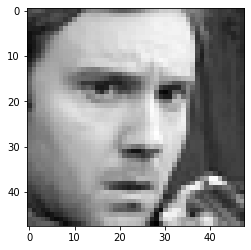

In [2]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

### 모델 학습하기

In [3]:
import tensorflow as tf

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=50,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))


Epoch 1/50
64/64 [==============================] - 36s 562ms/step - loss: 1.8274 - categorical_accuracy: 0.2466 - val_loss: 1.9312 - val_categorical_accuracy: 0.1744
Epoch 2/50
64/64 [==============================] - 6s 88ms/step - loss: 1.6627 - categorical_accuracy: 0.3336 - val_loss: 1.9237 - val_categorical_accuracy: 0.1744
Epoch 3/50
64/64 [==============================] - 6s 87ms/step - loss: 1.5549 - categorical_accuracy: 0.3924 - val_loss: 1.9192 - val_categorical_accuracy: 0.1368
Epoch 4/50
64/64 [==============================] - 6s 92ms/step - loss: 1.4540 - categorical_accuracy: 0.4349 - val_loss: 1.9221 - val_categorical_accuracy: 0.1368
Epoch 5/50
64/64 [==============================] - 6s 97ms/step - loss: 1.3740 - categorical_accuracy: 0.4736 - val_loss: 1.9245 - val_categorical_accuracy: 0.1368
Epoch 6/50
64/64 [==============================] - 7s 108ms/step - loss: 1.3154 - categorical_accuracy: 0.4970 - val_loss: 1.9279 - val_categorical_accuracy: 0.1655
Epoch 7

Epoch 49/50
64/64 [==============================] - 6s 97ms/step - loss: 0.1750 - categorical_accuracy: 0.9388 - val_loss: 2.5050 - val_categorical_accuracy: 0.1655
Epoch 50/50
64/64 [==============================] - 6s 94ms/step - loss: 0.1517 - categorical_accuracy: 0.9479 - val_loss: 2.5745 - val_categorical_accuracy: 0.1655


### 모델을 TensorFlow.js 형식으로 변환

In [8]:
import os
model_path = os.getenv('HOME')+'/project/aiffel-lms/E13_Imoji/model.h5'
model.save(model_path)

### 웹앱
https://hwan27.github.io/tfjs_mobile/